In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
data = pd.read_csv("../ml_data/housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [5]:
data1 = data.loc[:,['LSTAT', 'MEDV']]

In [6]:
data1.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
len(data1)

506

[]

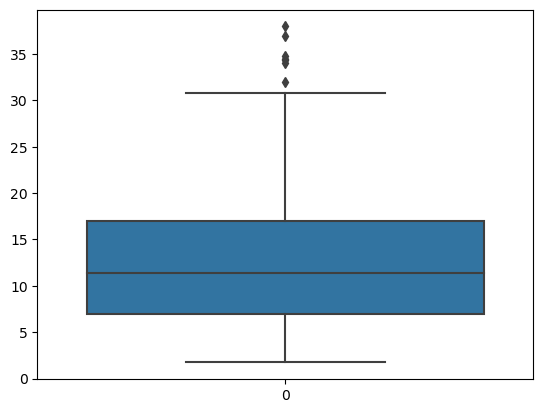

In [15]:
plt.figure()
sns.boxplot(data['LSTAT'])
plt.plot()

In [16]:
X = data1['LSTAT'].values.reshape(-1,1)

In [18]:
y = data1['MEDV'].values.reshape(-1,1)

In [19]:
lr1 = LinearRegression()

In [20]:
lr1.fit(X, y)

LinearRegression()

In [21]:
lr1.score(X, y)

0.5441462975864799

In [22]:
z = np.abs(stats.zscore(data1))

In [28]:
threshold = 3

In [29]:
data1_o_z = data1[(z<threshold).all(axis=1)]

In [30]:
len(data1_o_z)

501

[]

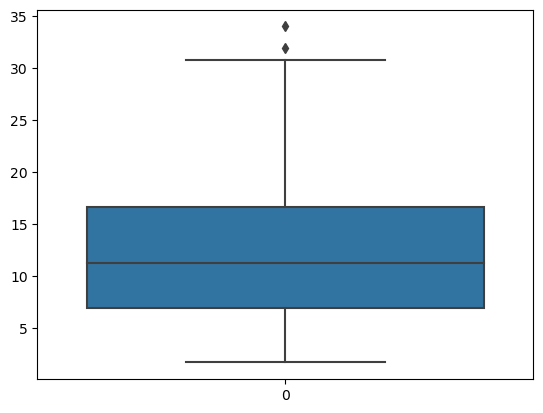

In [32]:
plt.figure()
sns.boxplot(data1_o_z['LSTAT'])
plt.plot()

In [36]:
X = data1_o_z['LSTAT'].values.reshape(-1,1)
y = data1_o_z['MEDV'].values.reshape(-1,1)

In [37]:
lr1_o_z = LinearRegression()

In [38]:
lr1_o_z.fit(X, y)

LinearRegression()

In [39]:
lr1_o_z.score(X, y)

0.561613442074578

In [40]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

In [42]:
outlier_condition = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 +1.5 * IQR)))
data1_o_iqr = data1[~outlier_condition.any(axis=1)]
len(data1_o_iqr)

459

[]

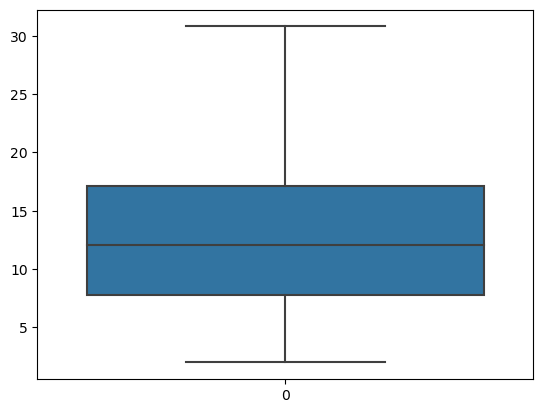

In [43]:
plt.figure()
sns.boxplot(data1_o_iqr['LSTAT'])
plt.plot()

In [45]:
lr_o_iqr = LinearRegression()
X = data1_o_iqr['LSTAT'].values.reshape(-1,1)
y = data1_o_iqr['MEDV'].values.reshape(-1,1)
lr_o_iqr.fit(X, y)
lr_o_iqr.score(X, y)

0.6087730602029617